In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dt_suffix = '21_01_2023_20_08_24'

In [ ]:
df = pd.read_csv(f'./data/treated/{dt_suffix}_pq_leiloes.csv',header=True)

In [ ]:
df_mkt_itens = df[['auction_item_highest_bid','auction_item_market_price','auction_date','auction_item_km','auction_item_color','auction_item_min_bid_value','auction_item_brand','perc_dec']].dropna()


In [ ]:
df_mkt_itens = df_mkt_itens.loc[df_mkt_itens.perc_dec>0]

In [ ]:
## Percentual médio do valor abaixo do mercado
print(f"As vendas são feitas em média a {100*df_mkt_itens['perc_dec'].mean()}% abaixo do valor de mercado")

As vendas são feitas em média a 34.16378169188371% abaixo do valor de mercado


<AxesSubplot:xlabel='auction_date'>

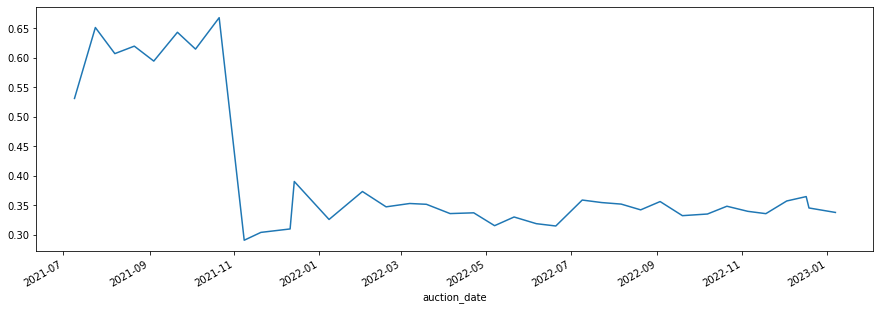

In [ ]:
## Percentual médio por data do valor abaixo do mercado. Quanto maior mais vantajosa a compra.
#### auction_item_market_price não existe em valore anteriores a 2021-07-09
df_mkt_itens.groupby('auction_date')['perc_dec'].mean().plot(figsize=(15,5))

<AxesSubplot:xlabel='auction_item_km', ylabel='perc_dec'>

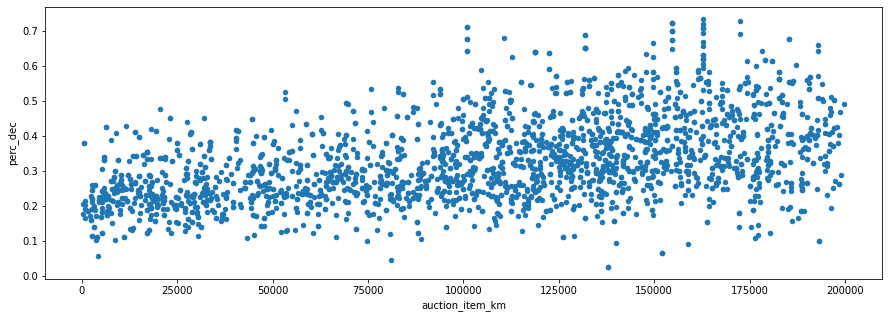

In [ ]:
## Valor percentual abaixo do mercado por kms rodados
df_mkt_itens.loc[df_mkt_itens.auction_item_km<200_000][['auction_item_km','perc_dec']].plot.scatter('auction_item_km','perc_dec',figsize=(15,5))

<AxesSubplot:xlabel='perc_dec', ylabel='auction_item_color'>

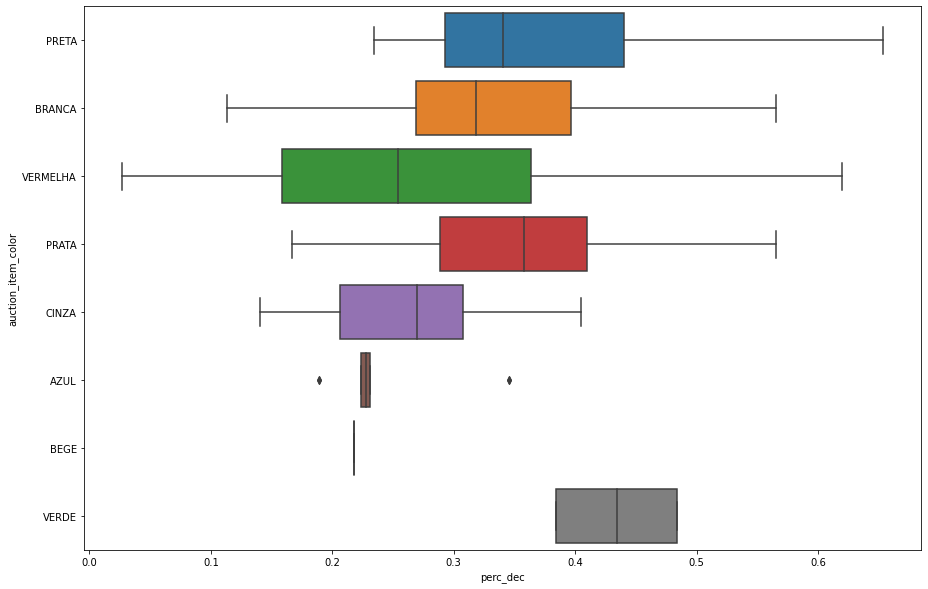

In [ ]:
## Valor percentual abaixo do mercado por kms rodados do último leilão por cor do carro
plt.figure(figsize=(15,10))
sns.boxplot(x='perc_dec', y='auction_item_color', data=df_mkt_itens.loc[df_mkt_itens['auction_date'] == df_itens['auction_date'].max()])

In [ ]:
df_mkt_itens.head(1)

,auction_item_highest_bid,auction_item_market_price,auction_date,auction_item_km,auction_item_color,auction_item_min_bid_value,auction_item_brand,perc_dec
111,73000.0,110681.0,2023-01-07,21837.0,PRETA,49500.0,NISSAN,0.340447


<AxesSubplot:xlabel='perc_dec', ylabel='auction_item_brand'>

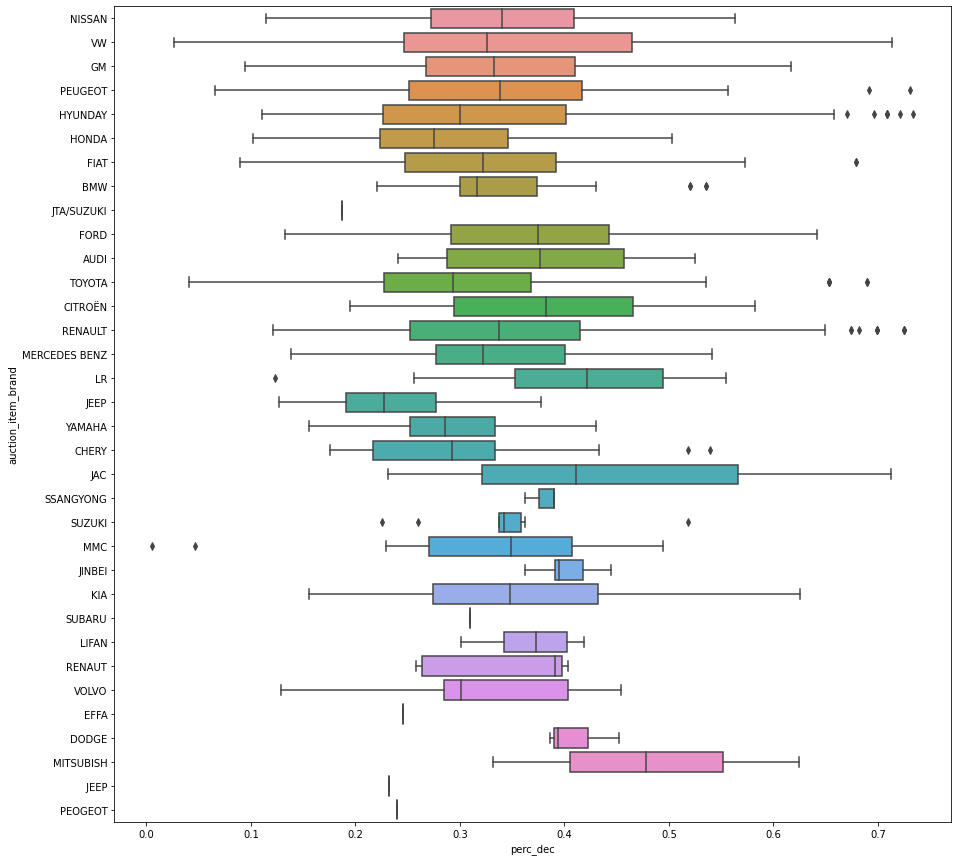

In [ ]:
## Valor percentual abaixo do mercado por kms rodados do último leilão por cor do carro por marca de carro
plt.figure(figsize=(15,15))
sns.boxplot(x='perc_dec', y='auction_item_brand', data=df_mkt_itens)

In [ ]:
df_mkt_itens.head(1)

,auction_item_highest_bid,auction_item_market_price,auction_date,auction_item_km,auction_item_color,auction_item_min_bid_value,auction_item_brand,perc_dec
111,73000.0,110681.0,2023-01-07,21837.0,PRETA,49500.0,NISSAN,0.340447


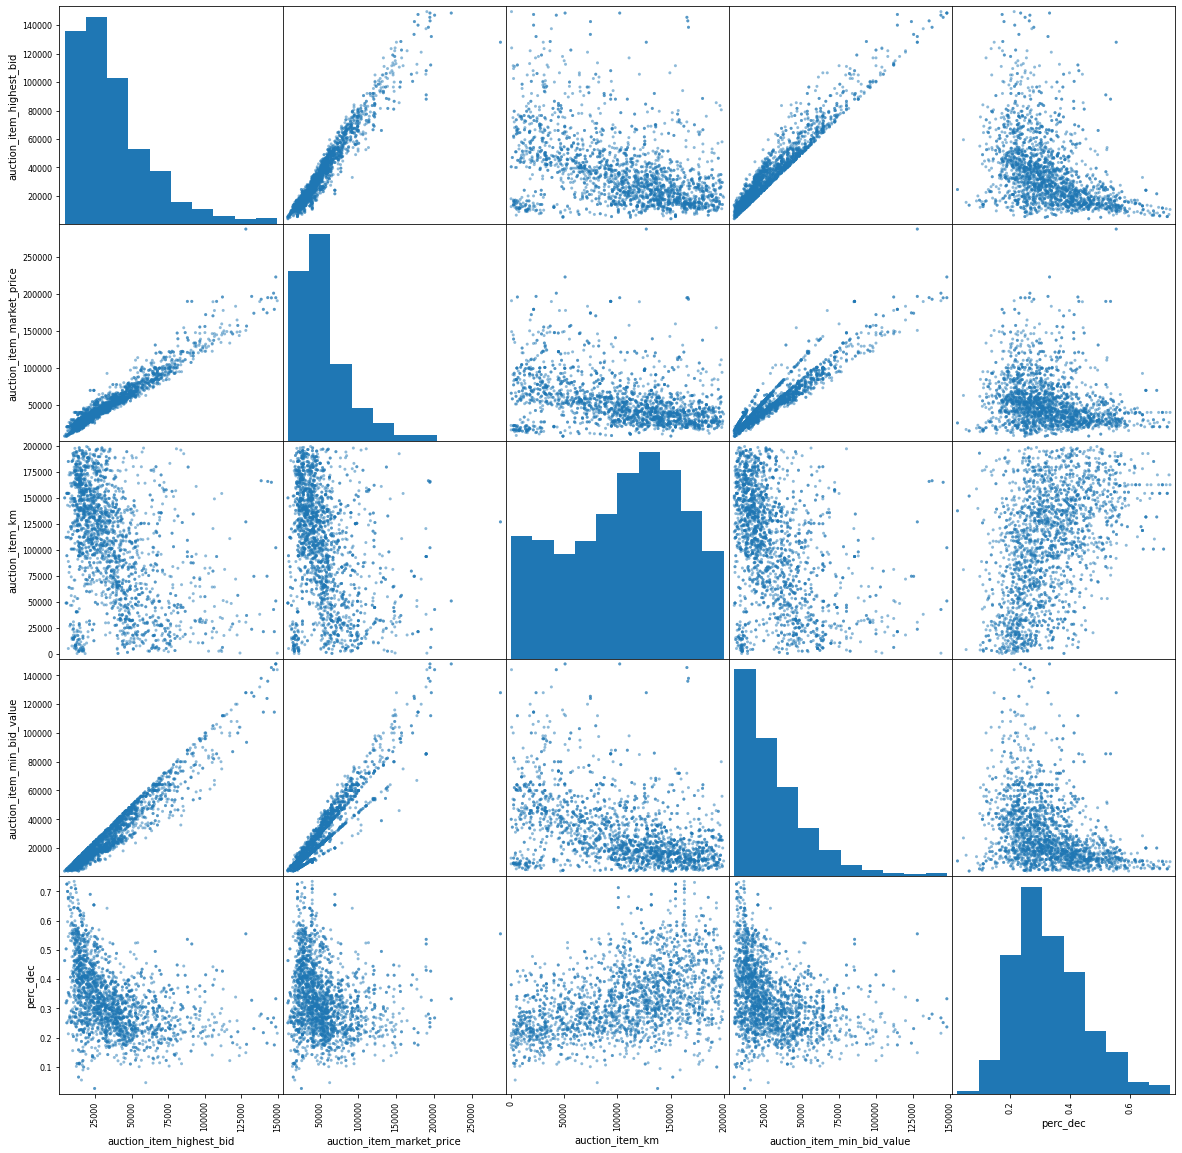

In [ ]:
a = pd.plotting.scatter_matrix(df_mkt_itens.loc[(df_mkt_itens.auction_item_highest_bid < 150_000) & ( df_mkt_itens.auction_item_km< 200_000)],figsize=(20,20))

In [ ]:
df_mkt_itens.head(1)

,auction_item_highest_bid,auction_item_market_price,auction_date,auction_item_km,auction_item_color,auction_item_min_bid_value,auction_item_brand,perc_dec
111,73000.0,110681.0,2023-01-07,21837.0,PRETA,49500.0,NISSAN,0.340447


In [ ]:
df_mkt_itens['year_month'] = df_mkt_itens.auction_date.dt.year.astype('str') + '-' + df_mkt_itens.auction_date.dt.month.astype('str')
df_mkt_itens['year'] = df_mkt_itens.auction_date.dt.year.astype('str')

<AxesSubplot:xlabel='auction_item_min_bid_value', ylabel='auction_item_market_price'>

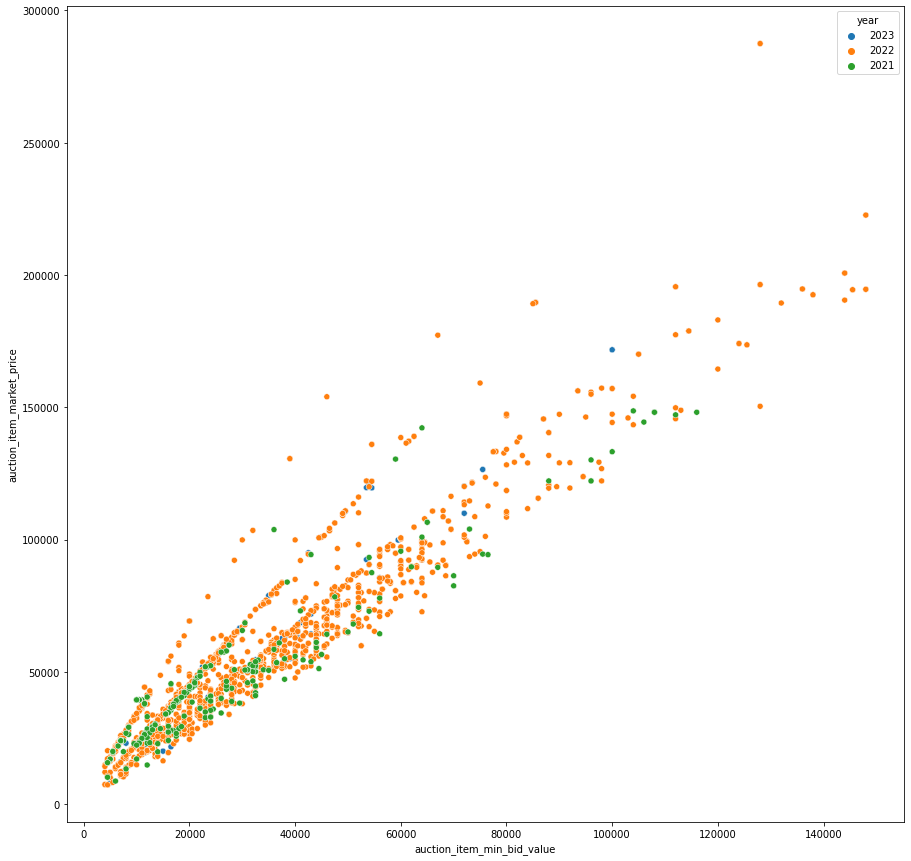

In [ ]:
##Relação entre valor de mercado e valor mínimo do lote
plt.figure(figsize=(15,15))
sns.scatterplot(data = df_mkt_itens.loc[(df_mkt_itens.auction_item_highest_bid < 150_000) & ( df_mkt_itens.auction_item_km< 200_000)],
               x='auction_item_min_bid_value',y='auction_item_market_price',hue='year')